In [ ]:
import os
import scipy.io
import pandas as pd
from sklearn.model_selection import train_test_split

# Define paths and labels
base_dir = "/content/drive/MyDrive/eye_feature_smooth"
session_dirs = {1: f"{base_dir}/1", 2: f"{base_dir}/2", 3: f"{base_dir}/3"}
session_labels = {
    1: [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3],
    2: [2, 1, 3, 0, 0, 2, 0, 2, 3, 3, 2, 3, 2, 0, 1, 1, 2, 1, 0, 3, 0, 1, 3, 1],
    3: [1, 2, 2, 1, 3, 3, 3, 1, 1, 2, 1, 0, 2, 3, 3, 0, 2, 3, 0, 0, 2, 0, 1, 0]
}
output_dir = "path_to_output"
os.makedirs(output_dir, exist_ok=True)

subject_splits = {}

# Clear previous results
for file in os.listdir(output_dir):
    os.remove(os.path.join(output_dir, file))
print("Cleared previous results and output directory.")

def process_and_split_subject(subject_id):
    combined_data = []
    for session_id, session_dir in session_dirs.items():
        file_path = next((os.path.join(session_dir, f) for f in os.listdir(session_dir) if f.startswith(f"{subject_id}_")), None)
        if not file_path:
            print(f"No data for Subject {subject_id} in Session {session_id}.")
            continue

        mat_data = scipy.io.loadmat(file_path)
        session_data = []

        for trial_idx in range(24):
            eye_key = f"eye_{trial_idx + 1}"
            if eye_key in mat_data:
                eye_data = mat_data[eye_key].T
                labels = [session_labels[session_id][trial_idx]] * eye_data.shape[0]
                trial_df = pd.DataFrame(eye_data, columns=[str(i + 1) for i in range(eye_data.shape[1])])
                trial_df.fillna(trial_df.mean(), inplace=True)
                trial_df["label"] = labels
                trial_df["session"] = session_id
                trial_df["trial"] = trial_idx + 1
                session_data.append(trial_df)

        if session_data:
            combined_session_data = pd.concat(session_data, axis=0, ignore_index=True)
            combined_data.append(combined_session_data)

    if combined_data:
        subject_data = pd.concat(combined_data, axis=0, ignore_index=True)
        subject_data.fillna(subject_data.mean(), inplace=True)  # Fill missing values
        subject_data["subject_id"] = subject_id
        output_file = os.path.join(output_dir, f"subject_{subject_id}_combined.csv")
        subject_data.to_csv(output_file, index=False)

        # Split data
        X = subject_data.iloc[:, :-4].values
        y = subject_data["label"].values
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, stratify=y_train_val, random_state=42)

        subject_splits[subject_id] = {
            "X_train": X_train, "y_train": y_train,
            "X_val": X_val, "y_val": y_val,
            "X_test": X_test, "y_test": y_test
        }
        print(f"Subject {subject_id} processed successfully.")
    else:
        print(f"No valid data for Subject {subject_id}.")

# Process all subjects
for subject_id in range(1, 16):
    process_and_split_subject(subject_id)

print("All subjects processed and split!")

# Assign data to global variables for verification
for subject_id, data in subject_splits.items():
    X_train, y_train = data["X_train"], data["y_train"]
    X_val, y_val = data["X_val"], data["y_val"]
    X_test, y_test = data["X_test"], data["y_test"]
    globals()[f"X{subject_id}_train"] = X_train
    globals()[f"y{subject_id}_train"] = y_train
    globals()[f"X{subject_id}_val"] = X_val
    globals()[f"y{subject_id}_val"] = y_val
    globals()[f"X{subject_id}_test"] = X_test
    globals()[f"y{subject_id}_test"] = y_test

# Verify by printing the shapes
for subject_id in range(1, 16):
    print(f"Subject {subject_id}:")
    print(f"  X{subject_id}_train shape: {globals()[f'X{subject_id}_train'].shape}")
    print(f"  y{subject_id}_train shape: {globals()[f'y{subject_id}_train'].shape}")
    print(f"  X{subject_id}_val shape: {globals()[f'X{subject_id}_val'].shape}")
    print(f"  y{subject_id}_val shape: {globals()[f'y{subject_id}_val'].shape}")
    print(f"  X{subject_id}_test shape: {globals()[f'X{subject_id}_test'].shape}")
    print(f"  y{subject_id}_test shape: {globals()[f'y{subject_id}_test'].shape}")

print("Verification complete!")


Cleared previous results and output directory.
Subject 1 processed successfully.
Subject 2 processed successfully.
Subject 3 processed successfully.
Subject 4 processed successfully.
Subject 5 processed successfully.
Subject 6 processed successfully.
Subject 7 processed successfully.
Subject 8 processed successfully.
Subject 9 processed successfully.
Subject 10 processed successfully.
Subject 11 processed successfully.
Subject 12 processed successfully.
Subject 13 processed successfully.
Subject 14 processed successfully.
Subject 15 processed successfully.
All subjects processed and split!
Subject 1:
  X1_train shape: (1803, 31)
  y1_train shape: (1803,)
  X1_val shape: (201, 31)
  y1_val shape: (201,)
  X1_test shape: (501, 31)
  y1_test shape: (501,)
Subject 2:
  X2_train shape: (1803, 31)
  y2_train shape: (1803,)
  X2_val shape: (201, 31)
  y2_val shape: (201,)
  X2_test shape: (501, 31)
  y2_test shape: (501,)
Subject 3:
  X3_train shape: (1803, 31)
  y3_train shape: (1803,)
  X3_

In [ ]:
# Iterate over all subjects
for subject_id in range(1, 16):  # Assuming 15 subjects
    X_train, y_train = globals()[f"X{subject_id}_train"], globals()[f"y{subject_id}_train"]
    X_val, y_val = globals()[f"X{subject_id}_val"], globals()[f"y{subject_id}_val"]
    X_test, y_test = globals()[f"X{subject_id}_test"], globals()[f"y{subject_id}_test"]

    # Calculate total samples across all splits
    total_samples = len(y_train) + len(y_val) + len(y_test)

    # Calculate percentages for splits
    train_percentage = (len(y_train) / total_samples) * 100
    val_percentage = (len(y_val) / total_samples) * 100
    test_percentage = (len(y_test) / total_samples) * 100

    # Print the distribution
    print(f"Subject {subject_id}:")
    print(f"  Training Set: {len(y_train)} samples ({train_percentage:.2f}%)")
    print(f"  Validation Set: {len(y_val)} samples ({val_percentage:.2f}%)")
    print(f"  Testing Set: {len(y_test)} samples ({test_percentage:.2f}%)")
    print("-" * 30)


Subject 1:
  Training Set: 1803 samples (71.98%)
  Validation Set: 201 samples (8.02%)
  Testing Set: 501 samples (20.00%)
------------------------------
Subject 2:
  Training Set: 1803 samples (71.98%)
  Validation Set: 201 samples (8.02%)
  Testing Set: 501 samples (20.00%)
------------------------------
Subject 3:
  Training Set: 1803 samples (71.98%)
  Validation Set: 201 samples (8.02%)
  Testing Set: 501 samples (20.00%)
------------------------------
Subject 4:
  Training Set: 1803 samples (71.98%)
  Validation Set: 201 samples (8.02%)
  Testing Set: 501 samples (20.00%)
------------------------------
Subject 5:
  Training Set: 1803 samples (71.98%)
  Validation Set: 201 samples (8.02%)
  Testing Set: 501 samples (20.00%)
------------------------------
Subject 6:
  Training Set: 1803 samples (71.98%)
  Validation Set: 201 samples (8.02%)
  Testing Set: 501 samples (20.00%)
------------------------------
Subject 7:
  Training Set: 1803 samples (71.98%)
  Validation Set: 201 sampl

In [ ]:

import pandas as pd
import os
from collections import Counter

# Define the path to the output directory where processed CSVs are saved
output_dir = "path_to_output"

# Function to check class distribution for a subject
def check_class_distribution(subject_id):
    # Path to the subject's combined data CSV
    subject_file = os.path.join(output_dir, f"subject_{subject_id}_combined.csv")
    if not os.path.exists(subject_file):
        print(f"File for Subject {subject_id} not found!")
        return None

    # Load the data
    subject_data = pd.read_csv(subject_file)

    # Count occurrences of each class in the 'label' column
    class_counts = Counter(subject_data["label"])
    total_samples = len(subject_data)

    print(f"Subject {subject_id}:")
    for class_label, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"  Class {class_label}: {count} samples ({percentage:.2f}%)")
    print(f"  Total Samples: {total_samples}")
    print("-" * 30)

# Iterate over all subjects and check class distribution
for subject_id in range(1, 16):  # Assuming subjects are numbered 1 to 15
    check_class_distribution(subject_id)


Subject 1:
  Class 1: 683 samples (27.27%)
  Class 2: 615 samples (24.55%)
  Class 3: 529 samples (21.12%)
  Class 0: 678 samples (27.07%)
  Total Samples: 2505
------------------------------
Subject 2:
  Class 1: 683 samples (27.27%)
  Class 2: 615 samples (24.55%)
  Class 3: 529 samples (21.12%)
  Class 0: 678 samples (27.07%)
  Total Samples: 2505
------------------------------
Subject 3:
  Class 1: 683 samples (27.27%)
  Class 2: 615 samples (24.55%)
  Class 3: 529 samples (21.12%)
  Class 0: 678 samples (27.07%)
  Total Samples: 2505
------------------------------
Subject 4:
  Class 1: 683 samples (27.27%)
  Class 2: 615 samples (24.55%)
  Class 3: 529 samples (21.12%)
  Class 0: 678 samples (27.07%)
  Total Samples: 2505
------------------------------
Subject 5:
  Class 1: 683 samples (27.27%)
  Class 2: 615 samples (24.55%)
  Class 3: 529 samples (21.12%)
  Class 0: 678 samples (27.07%)
  Total Samples: 2505
------------------------------
Subject 6:
  Class 1: 683 samples (27.27

Processing Subject 1...


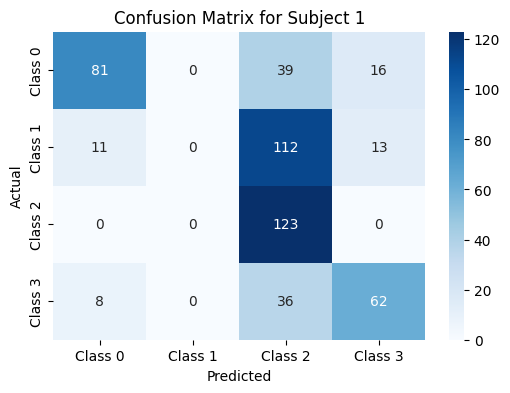

Subject 1: Train Acc: 0.62, Val Acc: 0.73, Test Acc: 0.53
Processing Subject 2...


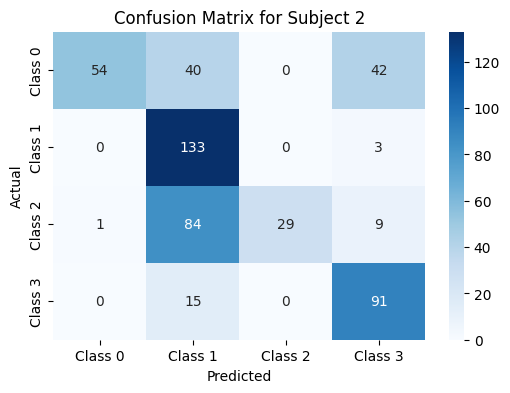

Subject 2: Train Acc: 0.77, Val Acc: 0.89, Test Acc: 0.61
Processing Subject 3...


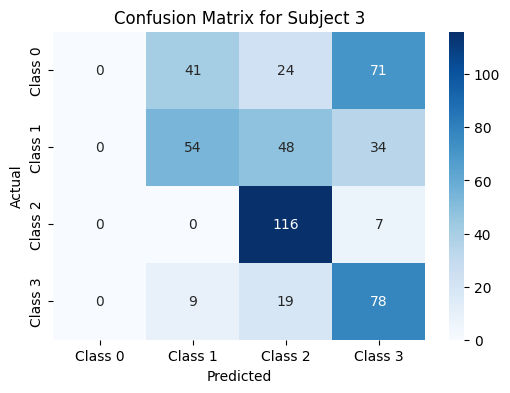

Subject 3: Train Acc: 0.43, Val Acc: 0.68, Test Acc: 0.50
Processing Subject 4...


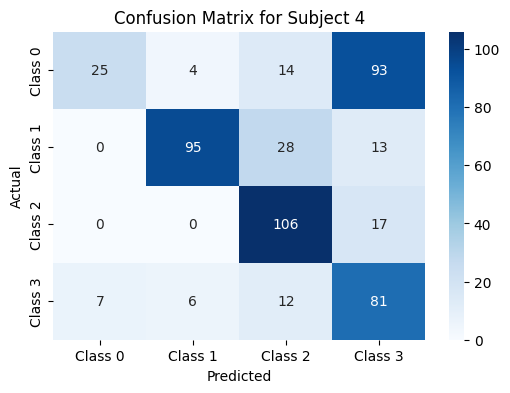

Subject 4: Train Acc: 0.63, Val Acc: 0.67, Test Acc: 0.61
Processing Subject 5...


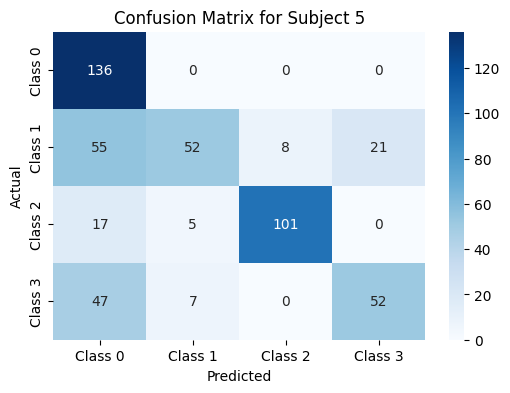

Subject 5: Train Acc: 0.66, Val Acc: 0.75, Test Acc: 0.68
Processing Subject 6...


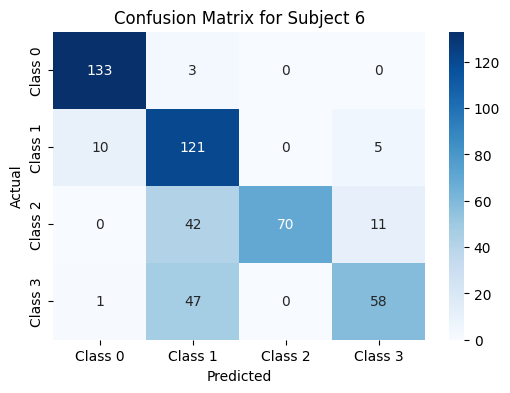

Subject 6: Train Acc: 0.75, Val Acc: 0.81, Test Acc: 0.76
Processing Subject 7...


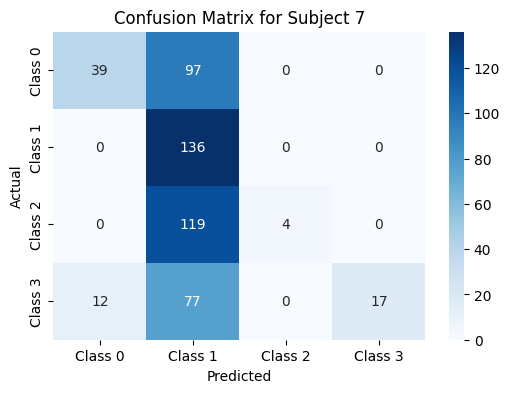

Subject 7: Train Acc: 0.52, Val Acc: 0.63, Test Acc: 0.39
Processing Subject 8...


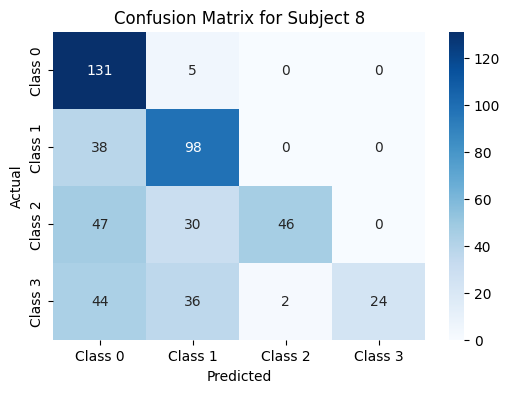

Subject 8: Train Acc: 0.73, Val Acc: 0.84, Test Acc: 0.60
Processing Subject 9...


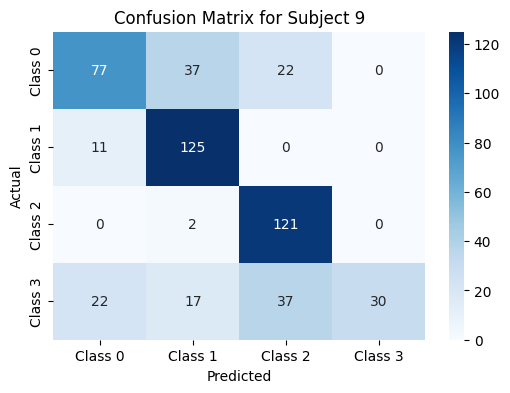

Subject 9: Train Acc: 0.66, Val Acc: 0.81, Test Acc: 0.70
Processing Subject 10...


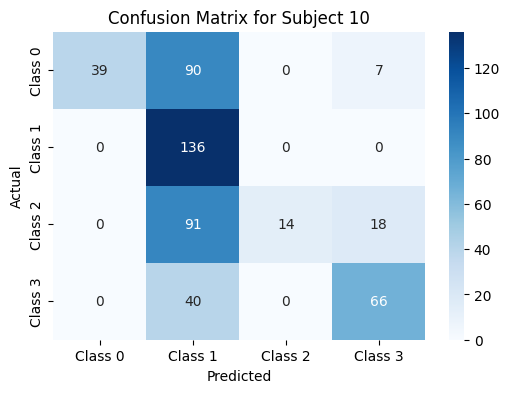

Subject 10: Train Acc: 0.64, Val Acc: 0.86, Test Acc: 0.51
Processing Subject 11...


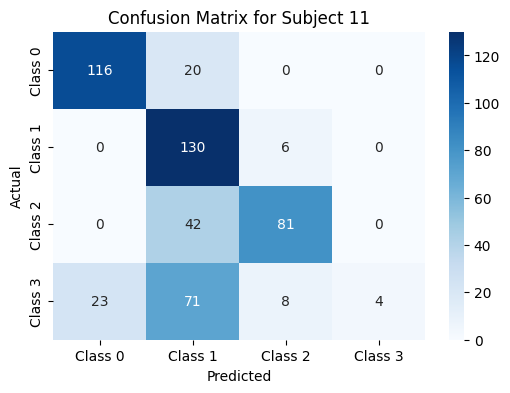

Subject 11: Train Acc: 0.65, Val Acc: 0.76, Test Acc: 0.66
Processing Subject 12...


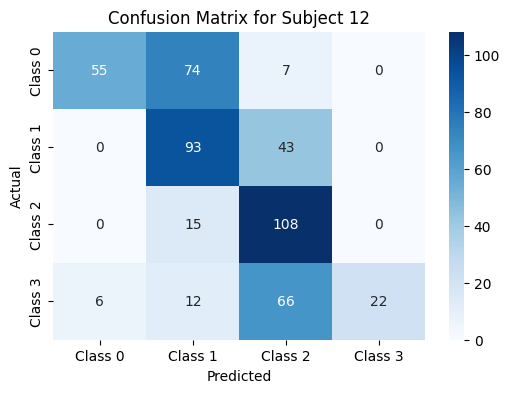

Subject 12: Train Acc: 0.57, Val Acc: 0.81, Test Acc: 0.55
Processing Subject 13...


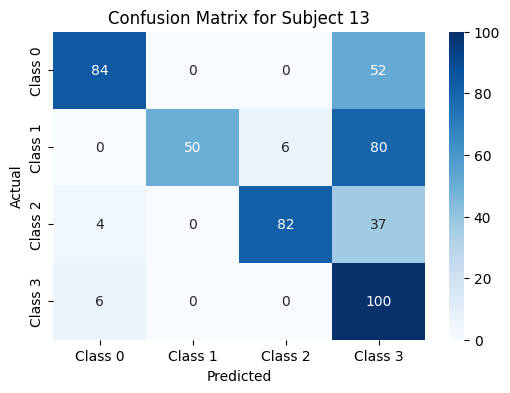

Subject 13: Train Acc: 0.69, Val Acc: 0.73, Test Acc: 0.63
Processing Subject 14...


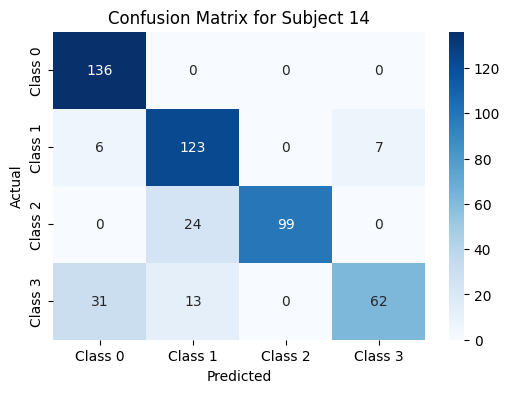

Subject 14: Train Acc: 0.81, Val Acc: 0.84, Test Acc: 0.84
Processing Subject 15...


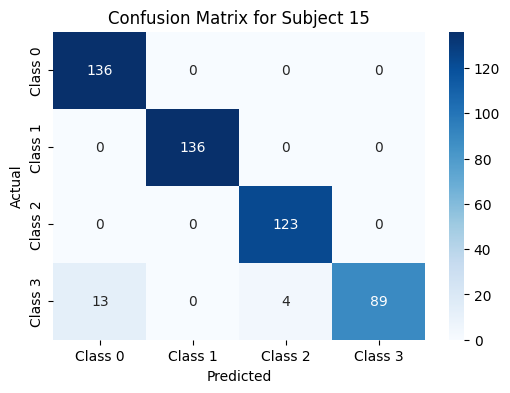

Subject 15: Train Acc: 0.96, Val Acc: 0.98, Test Acc: 0.97

Results with Average:
   Subject ID  Training Accuracy  Validation Accuracy  Test Accuracy
0           1           0.620632             0.731343       0.530938
1           2           0.772047             0.885572       0.612774
2           3           0.428730             0.676617       0.495010
3           4           0.630061             0.671642       0.612774
4           5           0.662784             0.751244       0.680639
5           6           0.754853             0.805970       0.762475
6           7           0.520244             0.626866       0.391218
7           8           0.729895             0.835821       0.596806
8           9           0.662784             0.805970       0.704591
9          10           0.644481             0.855721       0.508982
10         11           0.653910             0.756219       0.660679
11         12           0.572379             0.805970       0.554890
12         13        

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define DenseNet-like architecture for eye movement data
class DenseNetForEyeMovement(nn.Module):
    def __init__(self, input_dim=31, growth_rate=12, num_layers=4, output_dim=4):
        super(DenseNetForEyeMovement, self).__init__()
        self.input_dim = input_dim
        self.growth_rate = growth_rate

        layers = []
        current_dim = input_dim

        for _ in range(num_layers):
            layers.append(nn.Linear(current_dim, growth_rate))
            layers.append(nn.ReLU())
            current_dim += growth_rate

        self.dense_blocks = nn.ModuleList(layers)
        self.classifier = nn.Linear(current_dim, output_dim)

    def forward(self, x):
        # Ensure the input dimension matches the expected dimension
        if x.shape[1] != self.input_dim:
            raise ValueError(f"Expected input dimension {self.input_dim}, got {x.shape[1]}")

        for i in range(0, len(self.dense_blocks), 2):
            new_features = self.dense_blocks[i](x)  # Linear layer
            new_features = self.dense_blocks[i + 1](new_features)  # ReLU
            x = torch.cat([x, new_features], dim=1)
        return self.classifier(x)

# Train and evaluate a model for a single subject
def train_and_evaluate(subject_id, X_train, y_train, X_val, y_val, X_test, y_test):
    train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
    test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

    model = DenseNetForEyeMovement()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    best_val_accuracy = 0.0

    for epoch in range(30):  # Train for 30 epochs
        model.train()
        correct_train, total_train = 0, 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        train_accuracy = correct_train / total_train

        # Validate
        model.eval()
        correct_val, total_val = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        val_accuracy = correct_val / total_val
        best_val_accuracy = max(best_val_accuracy, val_accuracy)

    # Test
    model.eval()
    correct_test, total_test = 0, 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    test_accuracy = correct_test / total_test

    # Generate and display confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.title(f"Confusion Matrix for Subject {subject_id}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return train_accuracy, best_val_accuracy, test_accuracy

# Main script
results = []  # Initialize results list

for subject_id in range(1, 16):  # Assuming 15 subjects
    # Replace these with actual data loading
    X_train, y_train = globals()[f"X{subject_id}_train"], globals()[f"y{subject_id}_train"]
    X_val, y_val = globals()[f"X{subject_id}_val"], globals()[f"y{subject_id}_val"]
    X_test, y_test = globals()[f"X{subject_id}_test"], globals()[f"y{subject_id}_test"]

    print(f"Processing Subject {subject_id}...")
    train_acc, val_acc, test_acc = train_and_evaluate(subject_id, X_train, y_train, X_val, y_val, X_test, y_test)
    results.append({
        "Subject ID": subject_id,
        "Training Accuracy": train_acc,
        "Validation Accuracy": val_acc,
        "Test Accuracy": test_acc
    })
    print(f"Subject {subject_id}: Train Acc: {train_acc:.2f}, Val Acc: {val_acc:.2f}, Test Acc: {test_acc:.2f}")

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Add average row
# Add average row
average_row = pd.DataFrame([{
    "Subject ID": "Average",
    "Training Accuracy": results_df["Training Accuracy"].mean(),
    "Validation Accuracy": results_df["Validation Accuracy"].mean(),
    "Test Accuracy": results_df["Test Accuracy"].mean()
}])
results_df = pd.concat([results_df, average_row], ignore_index=True)

print("\nResults with Average:")
print(results_df)



